In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
f=open('samsung.csv','r')
coindesk_data=pd.read_csv(f,header=0)
seq=coindesk_data[['Close']].to_numpy()
def seq2dataset(seq,window,horizon):
  X=[]; Y=[]
  for i in range(len(seq)-(window+horizon)+1):
    x=seq[i:(i+window)]
    y=(seq[i+window+horizon-1])
    X.append(x); Y.append(y)
  return np.array(X), np.array(Y)
w=30
h=1
X,Y = seq2dataset(seq,w,h)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Bidirectional

split = int(len(X) * 0.7)
x_train, y_train = X[:split], Y[:split]
x_test, y_test = X[split:], Y[split:]

model = Sequential()

X_train, y_train = np.array(x_train), np.array(y_train)

# Match the size of X_train with the number of output samples
X_train = X_train[:y_train.shape[0]]

model.add(Bidirectional(LSTM(units=100, return_sequences=True, activation='relu'), input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second Bidirectional LSTM layer and some Dropout regularization
model.add(Bidirectional(LSTM(units=100, activation='relu', return_sequences=True)))
model.add(Dropout(0.2))

# Adding a third Bidirectional LSTM layer and some Dropout regularization
model.add(Bidirectional(LSTM(units=100, activation='relu', return_sequences=True)))
model.add(Dropout(0.2))

# Adding a fourth Bidirectional LSTM layer and some Dropout regularization
model.add(Bidirectional(LSTM(units=100, activation='relu')))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer='adam', loss='mae', metrics=['mae'])

# Fitting the RNN to the Training set
hist = model.fit(x_train, y_train, epochs=50, batch_size=1, validation_data=(x_test, y_test), verbose=2)


Epoch 1/50
495/495 - 74s - loss: 792881.1875 - mae: 792881.1875 - val_loss: 187654.9062 - val_mae: 187654.9062 - 74s/epoch - 149ms/step
Epoch 2/50
495/495 - 67s - loss: 384766.1562 - mae: 384766.1562 - val_loss: 519395.1875 - val_mae: 519395.1875 - 67s/epoch - 136ms/step
Epoch 3/50
495/495 - 69s - loss: 268719.6250 - mae: 268719.6250 - val_loss: 974858.3125 - val_mae: 974858.3125 - 69s/epoch - 139ms/step
Epoch 4/50
495/495 - 66s - loss: 184872.2188 - mae: 184872.2188 - val_loss: 286322.5625 - val_mae: 286322.5625 - 66s/epoch - 133ms/step
Epoch 5/50
495/495 - 71s - loss: 155594.9219 - mae: 155594.9219 - val_loss: 40263.9609 - val_mae: 40263.9609 - 71s/epoch - 143ms/step
Epoch 6/50
495/495 - 69s - loss: 119048.8047 - mae: 119048.8047 - val_loss: 113252.3125 - val_mae: 113252.3125 - 69s/epoch - 139ms/step
Epoch 7/50
495/495 - 67s - loss: 161275.5625 - mae: 161275.5625 - val_loss: 63331.1328 - val_mae: 63331.1328 - 67s/epoch - 135ms/step
Epoch 8/50
495/495 - 68s - loss: 151089.8281 - mae: 

손실함수 18377.48046875 mae: 18377.48046875


Exception ignored in: <function _xla_gc_callback at 0x7cf4e6a7a440>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


7/7 [==============================] - 47s 88ms/step
상관계수: 0.42028102912930054
평균절댓값백분율오차(MAPE): [0.26456577]


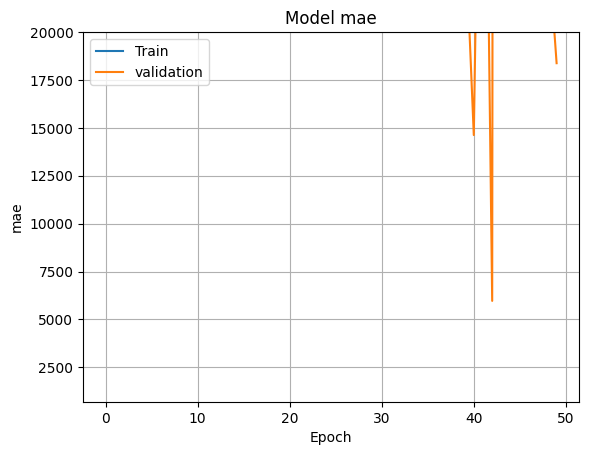

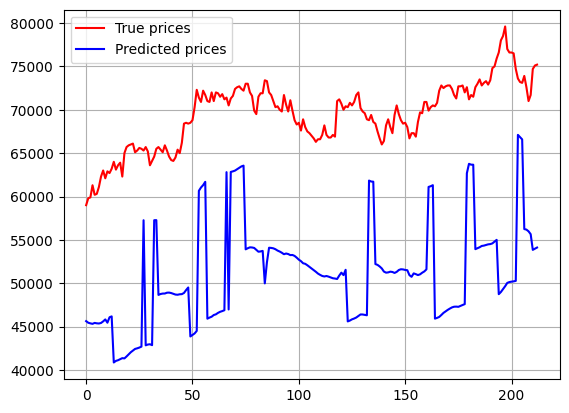

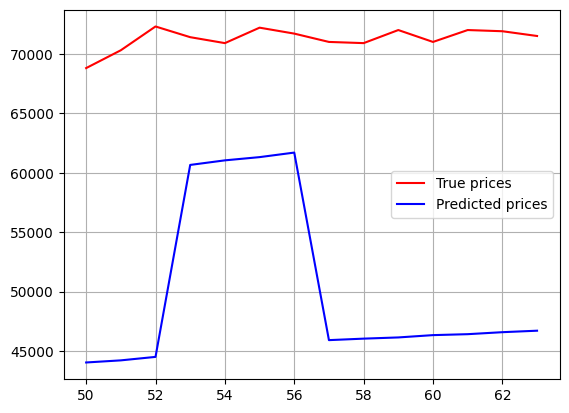

[[71500]
 [72600]
 [73000]
 [73500]
 [72800]
 [73100]
 [73300]
 [72900]
 [73400]
 [74800]
 [75000]
 [75900]
 [76600]
 [78000]
 [78500]
 [79600]
 [77000]
 [76600]
 [76600]
 [76500]
 [74700]
 [73600]
 [73200]
 [73100]
 [73900]
 [72600]
 [71000]
 [71700]
 [74700]
 [75100]]
7/7 [==============================] - 1s 84ms/step
[[55003.254]
 [48742.086]
 [48990.836]
 [49329.586]
 [49659.668]
 [50040.234]
 [50137.05 ]
 [50185.633]
 [50220.21 ]
 [50272.203]
 [67105.02 ]
 [66850.44 ]
 [66583.555]
 [56246.21 ]
 [56185.31 ]
 [55987.49 ]
 [55657.55 ]
 [53850.582]
 [53977.797]]


In [ ]:
ev = model.evaluate(x_test, y_test, verbose=0)
print("손실함수", ev[0], "mae:", ev[1])

pred = model.predict(x_test)

# 상관계수 계산
correlation_coefficient = np.corrcoef(y_test.flatten(), pred.flatten())[0, 1]
print("상관계수:", correlation_coefficient)

print("평균절댓값백분율오차(MAPE):", sum(abs(y_test - pred) / y_test) / len(x_test))

plt.plot(hist.history['mae'])
plt.plot(hist.history['val_mae'])
plt.title("Model mae")
plt.ylabel('mae')
plt.xlabel('Epoch')
plt.ylim([700, 20000])
plt.legend(['Train','validation'],loc='best')
plt.grid()
plt.show()

x_range = range(len(y_test))
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

x_range = range(50, 64)
plt.plot(x_range, y_test[x_range], color='red')
plt.plot(x_range, pred[x_range], color='blue')
plt.legend(['True prices','Predicted prices'], loc='best')
plt.grid()
plt.show()

recent_reu = x_test[-1]
print(recent_reu)
last_p = model.predict(x_test)
print(last_p[-20:-1])


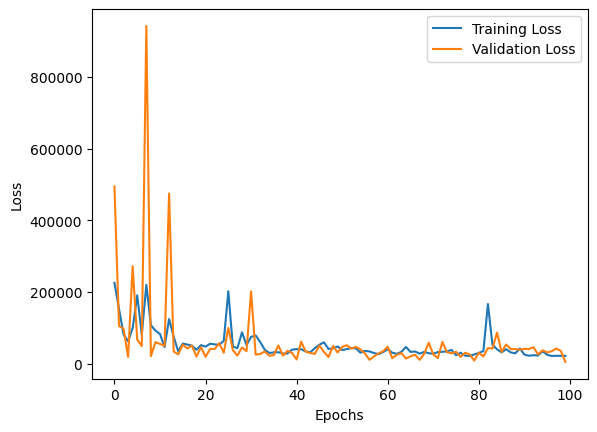

In [ ]:
plt.plot(hist.history['loss'], label='Training Loss')
plt.plot(hist.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()